# Comparativa Algoritmos de Ordenación

## Implementación de Algoritmos de Ordenamiento

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

### BubbleSort

In [2]:
class BubbleSort:
    def __init__(self, array):
        self.array = copy.deepcopy(array)
        self.num_comparisons = 0
        self.num_swaps = 0
        self.n = len(array)

    def sorting(self):
        for i in range(self.n - 1):
            for j in range(0, self.n - i - 1):
                self.num_comparisons += 1
                if self.array[j + 1] < self.array[j]:
                    self.array[j + 1] , self.array[j] = self.array[j] , self.array[j + 1]
                    self.num_swaps += 1

### FlagBubbleSort

In [3]:
class FlagBubbleSort:
    def __init__(self, array):
        self.array = copy.deepcopy(array)
        self.num_comparisons = 0
        self.num_swaps = 0
        self.n = len(array)

    def sorting(self):
        for i in range(self.n - 1):
            swapped = False
            for j in range(0, self.n - i - 1):
                self.num_comparisons += 1
                if self.array[j + 1] < self.array[j]:
                    self.array[j + 1] , self.array[j] = self.array[j] , self.array[j + 1]
                    self.num_swaps += 1
                    swapped = True
            if not swapped:
                break

### QuickSort

In [4]:
def median_of_3(array, low, high):
    x1 = array[low]
    middle = (low + high + 1)//2
    x2 = array[middle]
    x3 = array[high]
    if (x2 <= x1 and x1<=x3) or (x3 <= x1 and x1<=x2):
        return low
    elif(x1 <= x2 and x2<=x3) or (x3 <= x2 and x2<=x1):
        return middle
    else:
        return high

In [5]:
class QuickSort:
    def __init__(self, array) -> None:
        self.array = copy.deepcopy(array)
        self._num_comparisons = 0
        self._num_swaps = 0
        self.n = len(array)
    def partition(self, low, high):
        """
        Create partition function for inplace array modification
        """
        i = low - 1
        pivot_index = median_of_3(self.array, low, high)
        self.array[pivot_index], self.array[high] = self.array[high], self.array[pivot_index]
        #print('partition index: ', self.array[pivot_index])
        pivot = self.array[high]
        for j in range(low, high):
            self.num_comparisons += 1
            if self.array[j] <= pivot:
                self.num_swaps += 1
                i = i + 1
                self.array[j], self.array[i] = self.array[i], self.array[j]
        self.array[i + 1], self.array[high] = self.array[high], self.array[i + 1]
        return i + 1

    def q_sort(self, low, high):
        """
        Perform recursive calls
        """
        if low < high:
            q = self.partition(low, high)
            #print('pivot: ', self.array[q], ', index: ', q)
            #print(self.array)
            self.q_sort(low, q - 1)
            self.q_sort(q + 1, high)
    def sorting(self):
        #print('1st call: ', self.array)
        self.num_comparisons = 0
        self.num_swaps = 0
        self.q_sort(0, self.n - 1)

## Comparativa de performance

In [6]:
comparisons_qs = []
swaps_qs = []
comparisons_bs = []
swaps_bs = []
comparisons_fbs = []
swaps_fbs = []
lenghts = []

In [7]:
for i in range(100, 2_001, 100):
    temp_arr = np.random.randint(0, 100_000, i)
    temp_qsort = QuickSort(temp_arr)
    temp_qsort.sorting()
    temp_bsort = BubbleSort(temp_arr)
    temp_bsort.sorting()
    temp_fbsort = FlagBubbleSort(temp_arr)
    temp_fbsort.sorting()
    lenghts.append(i)
    swaps_qs.append(temp_qsort.num_swaps)
    comparisons_qs.append(temp_qsort.num_comparisons)
    swaps_bs.append(temp_bsort.num_swaps)
    comparisons_bs.append(temp_bsort.num_comparisons)
    swaps_fbs.append(temp_fbsort.num_swaps)
    comparisons_fbs.append(temp_fbsort.num_comparisons)
    print(f'Array {i} done')

Array 100 done
Array 200 done
Array 300 done
Array 400 done
Array 500 done
Array 600 done
Array 700 done
Array 800 done
Array 900 done
Array 1000 done
Array 1100 done
Array 1200 done
Array 1300 done
Array 1400 done
Array 1500 done
Array 1600 done
Array 1700 done
Array 1800 done
Array 1900 done
Array 2000 done


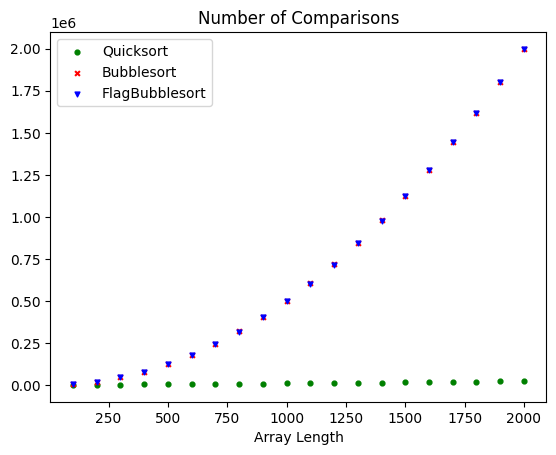

In [8]:
plt.scatter(x = lenghts, y = comparisons_qs, label='Quicksort', s = 12, c = 'g')
plt.scatter(x = lenghts, y = comparisons_bs, label='Bubblesort', s = 12, c = 'r', marker = 'x')
plt.scatter(x = lenghts, y = comparisons_fbs, label='FlagBubblesort', s = 12, c = 'b', marker = 'v')
plt.title('Number of Comparisons')
plt.xlabel('Array Length')
plt.legend()
plt.show()

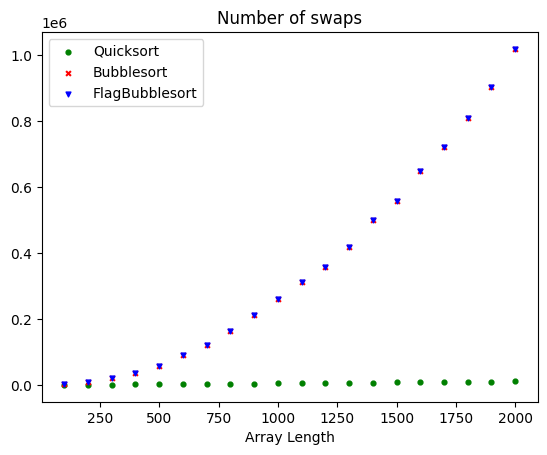

In [9]:
plt.scatter(x = lenghts, y = swaps_qs, label='Quicksort', s = 12, c = 'g')
plt.scatter(x = lenghts, y = swaps_bs, label='Bubblesort', s = 12, c = 'r', marker = 'x')
plt.scatter(x = lenghts, y = swaps_fbs, label='FlagBubblesort', s = 12, c = 'b', marker = 'v')
plt.xlabel('Array Length')
plt.title('Number of swaps')
plt.legend()
plt.show()

In [24]:
grupo_control = [4.9, 4.8, 5.1, 4.8, 4.8, 4.9, 4.9, 5.0]
grupo_experimental = [4.8, 4.9, 5.0, 4.9, 4.3, 4.2, 4.4, 4.4]
names = ['1er previo', '2do previo', '3er previo', '4to previo', '1er posterior', '2do posterior', '3er posterior', '4to posterior']

In [33]:
valores = grupo_control + grupo_experimental
names2 = names +names
grupos_num = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
grupos = ['Control' if i == 1 else 'Experimental' for i in grupos_num]



In [34]:
valores

[4.9,
 4.8,
 5.1,
 4.8,
 4.8,
 4.9,
 4.9,
 5.0,
 4.8,
 4.9,
 5.0,
 4.9,
 4.3,
 4.2,
 4.4,
 4.4]

In [35]:
names2

['1er previo',
 '2do previo',
 '3er previo',
 '4to previo',
 '1er posterior',
 '2do posterior',
 '3er posterior',
 '4to posterior',
 '1er previo',
 '2do previo',
 '3er previo',
 '4to previo',
 '1er posterior',
 '2do posterior',
 '3er posterior',
 '4to posterior']

In [48]:
import pandas as pd

df = pd.DataFrame({'Grupos':grupos, 'Periodo':names2, 'Consumo':valores})

In [49]:
df

,Grupos,Periodo,Consumo
0,Control,1er previo,4.9
1,Control,2do previo,4.8
2,Control,3er previo,5.1
3,Control,4to previo,4.8
4,Control,1er posterior,4.8
5,Control,2do posterior,4.9
6,Control,3er posterior,4.9
7,Control,4to posterior,5.0
8,Experimental,1er previo,4.8
9,Experimental,2do previo,4.9


In [50]:
import seaborn as sns
sns.set_context("paper")
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

colors = ["#807fff", "#fd7f82", "#84a97e"]
sns.set_palette(sns.color_palette(colors))

<Axes: xlabel='Consumo', ylabel='Periodo'>

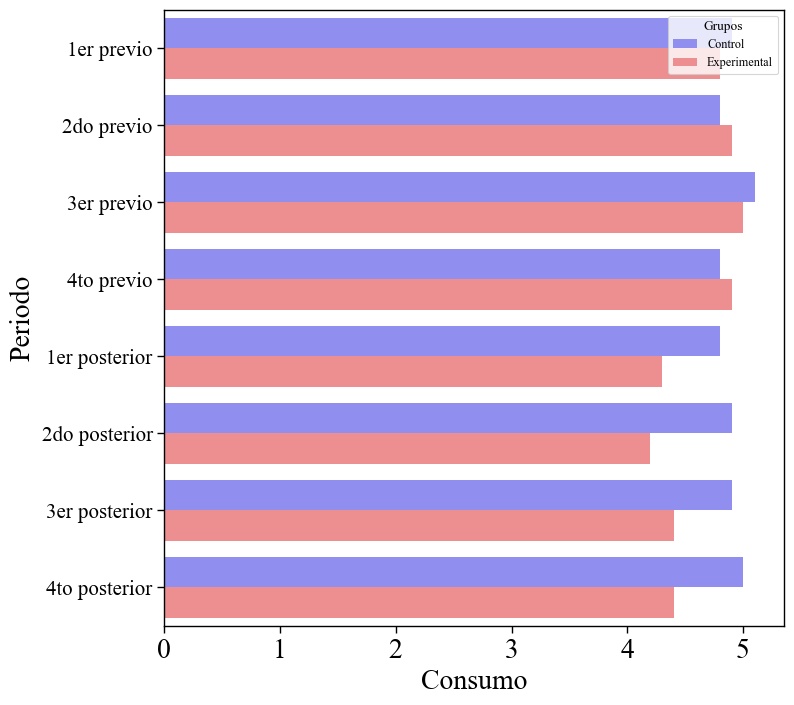

In [51]:
sns.barplot(x='Consumo', y= 'Periodo', hue = 'Grupos', data = df)

<Axes: xlabel='Consumo', ylabel='Grupos'>

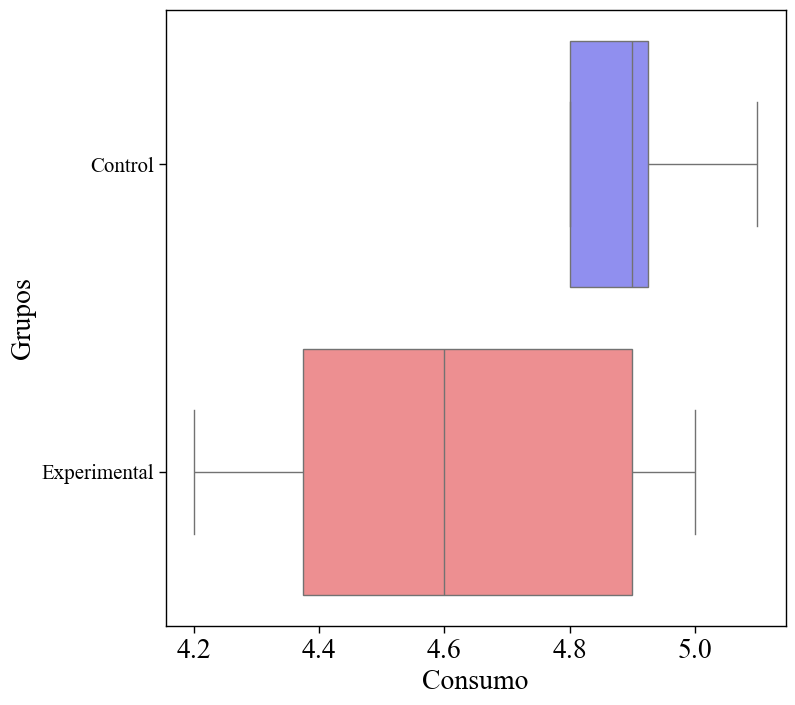

In [55]:
sns.boxplot(x='Consumo', y = 'Grupos', data = df, hue='Grupos')

En Terminal
Ejecutar

pdflatex reporte_quicksort.tex

bibtex reporte_quicksort Este es el que falta

pdflatex reporte_quicksort.tex

pdflatex reporte_quicksort.tex

In [61]:
from scipy.stats import binom

# Calculate the probability of exactly 3 successes in 10 trials with p=0.5
for i in range(0,4):
    prob_exact_3 = binom.pmf(k=i, n=3, p=4/7)
    print(f"Probability of exactly {i} successes: {prob_exact_3}")



Probability of exactly 0 successes: 0.07871720116618079
Probability of exactly 1 successes: 0.3148688046647231
Probability of exactly 2 successes: 0.41982507288629733
Probability of exactly 3 successes: 0.1865889212827988


In [59]:
1/35

0.02857142857142857

In [60]:
12/35

0.34285714285714286

In [62]:
18/35

0.5142857142857142

In [63]:
4/35

0.11428571428571428

In [64]:
12/7

1.7142857142857142